In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, OPTICS
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
data = pd.read_csv("../OLD_SCRIPT/DatasetmalwareExtrait.csv")

# Séparer les caractéristiques (X)
X = data.drop(columns=["legitimate"])

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Réduction à 2 dimensions pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

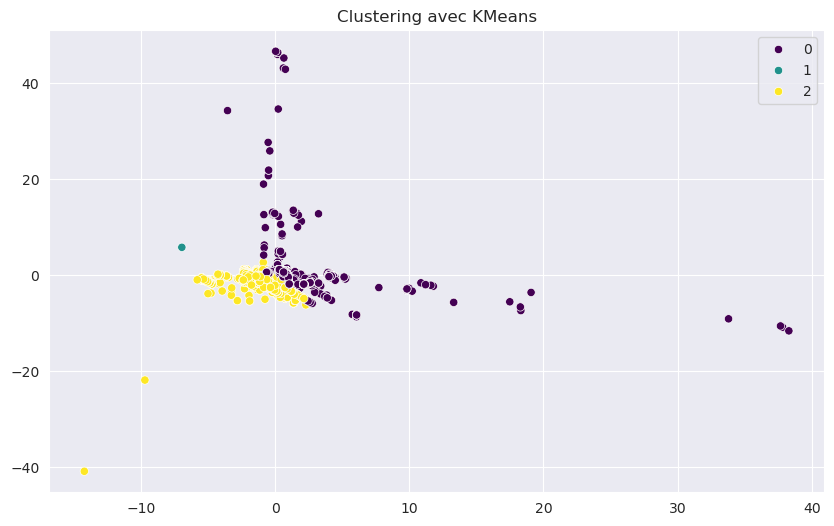

In [3]:
# Modèle KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualisation KMeans
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('Clustering avec KMeans')
plt.show()

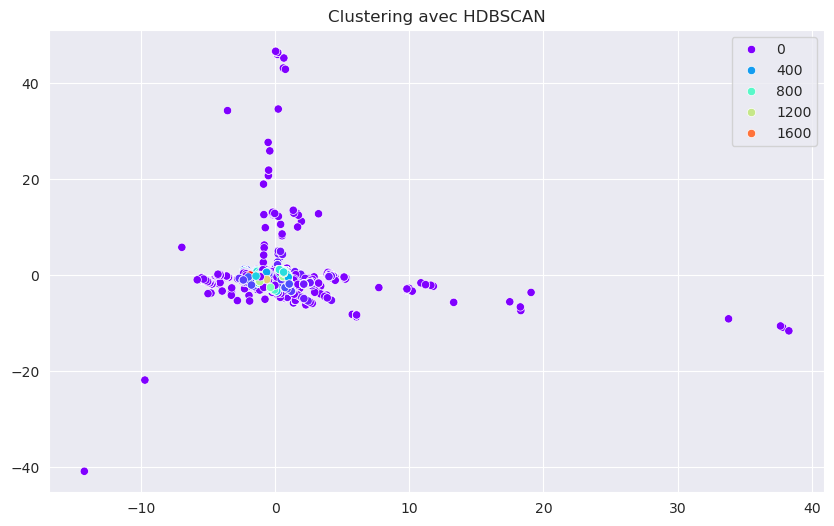

In [4]:
# Modèle HDBSCAN
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10)
hdbscan_labels = hdbscan_model.fit_predict(X_scaled)

# Visualisation HDBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hdbscan_labels, palette='rainbow')
plt.title('Clustering avec HDBSCAN')
plt.show()

/home/imryuik/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


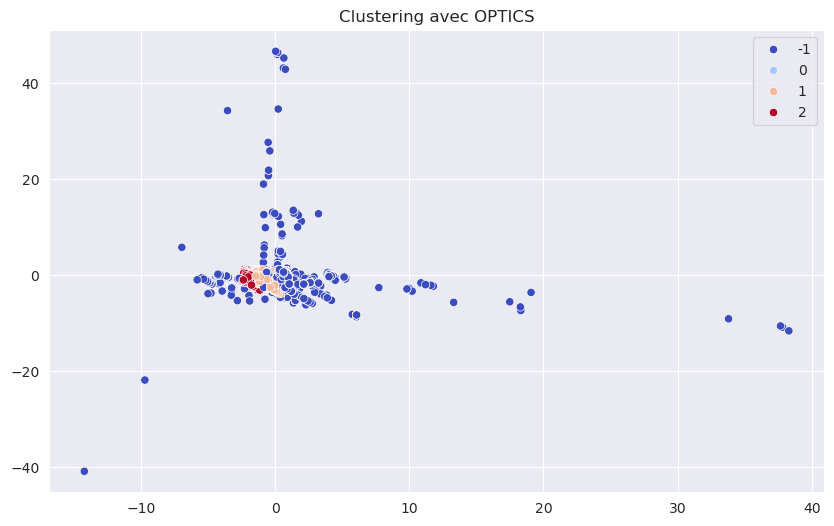

In [5]:
# Modèle OPTICS
optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.1)
optics_labels = optics.fit_predict(X_scaled)

# Visualisation OPTICS
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=optics_labels, palette='coolwarm')
plt.title('Clustering avec OPTICS')
plt.show()

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# KMeans
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))
print("KMeans Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans_labels))

# HDBSCAN
print("HDBSCAN Silhouette Score:", silhouette_score(X_scaled, hdbscan_labels))
print("HDBSCAN Davies-Bouldin Index:", davies_bouldin_score(X_scaled, hdbscan_labels))
print("HDBSCAN Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, hdbscan_labels))

KMeans Silhouette Score: 0.5389443515934719
KMeans Davies-Bouldin Index: 0.6677554248767797
KMeans Calinski-Harabasz Index: 26032.20935060091
HDBSCAN Silhouette Score: 0.7267382241975124
HDBSCAN Davies-Bouldin Index: 1.2862393651711674
HDBSCAN Calinski-Harabasz Index: 80.06371541107237


In [8]:

# OPTICS
print("OPTICS Silhouette Score:", silhouette_score(X_scaled, optics_labels))
print("OPTICS Davies-Bouldin Index:", davies_bouldin_score(X_scaled, optics_labels))
print("OPTICS Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, optics_labels))

OPTICS Silhouette Score: -0.03603303825380355
OPTICS Davies-Bouldin Index: 2.454135881876525
OPTICS Calinski-Harabasz Index: 9522.265336999071


In [9]:
import pandas as pd
import numpy as np

# Créer un DataFrame pour les résultats de KMeans
kmeans_df = pd.DataFrame({
    'Cluster': kmeans_labels,
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1]
})

# Statistiques par cluster
kmeans_summary = kmeans_df.groupby('Cluster').agg(
    Count=('Cluster', 'count'),
    PCA1_Mean=('PCA1', 'mean'),
    PCA2_Mean=('PCA2', 'mean')
).reset_index()

print("\n🟢 **Résumé des Clusters KMeans :**")
print(kmeans_summary)



🟢 **Résumé des Clusters KMeans :**
   Cluster  Count  PCA1_Mean  PCA2_Mean
0        0  91803   0.679139   0.282080
1        1      1  -6.965942   5.819572
2        2  45640  -1.365907  -0.567520


In [10]:
# Créer un DataFrame pour les résultats de HDBSCAN
hdbscan_df = pd.DataFrame({
    'Cluster': hdbscan_labels,
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1]
})

# Statistiques par cluster
hdbscan_summary = hdbscan_df.groupby('Cluster').agg(
    Count=('Cluster', 'count'),
    PCA1_Mean=('PCA1', 'mean'),
    PCA2_Mean=('PCA2', 'mean')
).reset_index()

print("\n🔵 **Résumé des Clusters HDBSCAN :**")
print(hdbscan_summary)



🔵 **Résumé des Clusters HDBSCAN :**
      Cluster  Count  PCA1_Mean  PCA2_Mean
0          -1  14839  -0.956898  -0.183584
1           0     18   0.188920  45.438636
2           1     22  13.304190  -5.656330
3           2     27  10.082099  -2.691940
4           3     28  -3.643769  -0.159885
...       ...    ...        ...        ...
1881     1880     12  -1.870469   0.042287
1882     1881     16  -1.870469   0.042286
1883     1882     30  -1.870469   0.042286
1884     1883     18  -1.870462   0.042306
1885     1884     17  -1.870462   0.042307

[1886 rows x 4 columns]


In [11]:
# Créer un DataFrame pour les résultats de OPTICS
optics_df = pd.DataFrame({
    'Cluster': optics_labels,
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1]
})

# Statistiques par cluster
optics_summary = optics_df.groupby('Cluster').agg(
    Count=('Cluster', 'count'),
    PCA1_Mean=('PCA1', 'mean'),
    PCA2_Mean=('PCA2', 'mean')
).reset_index()

print("\n🟠 **Résumé des Clusters OPTICS :**")
print(optics_summary)



🟠 **Résumé des Clusters OPTICS :**
   Cluster  Count  PCA1_Mean  PCA2_Mean
0       -1  73716   0.642958   0.178964
1        0  20342   0.619310   0.468845
2        1  18959  -0.816830  -1.049665
3        2  24427  -1.822084  -0.115821


In [12]:
# Récapitulatif global des algorithmes
comparison_df = pd.DataFrame({
    'Algorithme': ['KMeans', 'HDBSCAN', 'OPTICS'],
    'Nombre de Clusters': [len(kmeans_summary), len(hdbscan_summary), len(optics_summary)],
    'Taille Moyenne des Clusters': [
        kmeans_summary['Count'].mean(),
        hdbscan_summary['Count'].mean(),
        optics_summary['Count'].mean()
    ],
    'Silhouette Score': [
        silhouette_score(X_scaled, kmeans_labels),
        silhouette_score(X_scaled, hdbscan_labels) if len(set(hdbscan_labels)) > 1 else np.nan,
        silhouette_score(X_scaled, optics_labels) if len(set(optics_labels)) > 1 else np.nan
    ],
    'Davies-Bouldin Index': [
        davies_bouldin_score(X_scaled, kmeans_labels),
        davies_bouldin_score(X_scaled, hdbscan_labels) if len(set(hdbscan_labels)) > 1 else np.nan,
        davies_bouldin_score(X_scaled, optics_labels) if len(set(optics_labels)) > 1 else np.nan
    ]
})

print("\n📊 **Comparaison Globale des Algorithmes Non Supervisés :**")
print(comparison_df)



📊 **Comparaison Globale des Algorithmes Non Supervisés :**
  Algorithme  Nombre de Clusters  Taille Moyenne des Clusters  \
0     KMeans                   3                 45814.666667   
1    HDBSCAN                1886                    72.875928   
2     OPTICS                   4                 34361.000000   

   Silhouette Score  Davies-Bouldin Index  
0          0.538944              0.667755  
1          0.726738              1.286239  
2         -0.036033              2.454136  


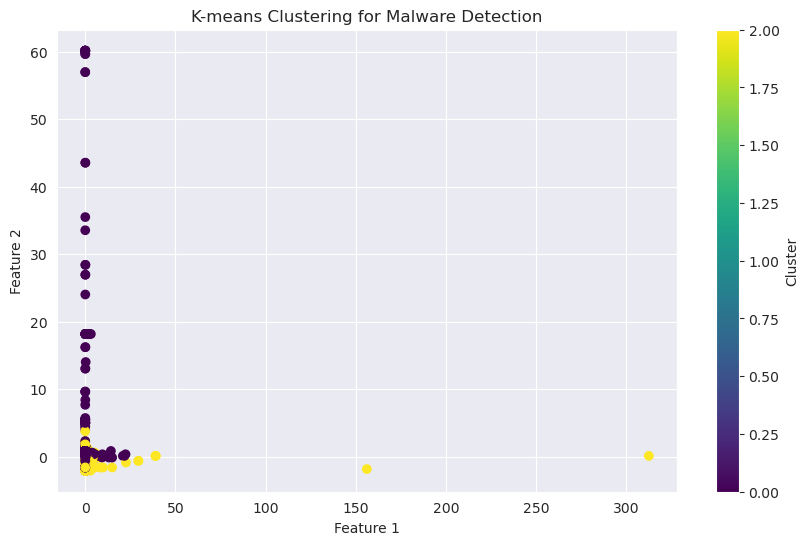

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('../OLD_SCRIPT/DatasetmalwareExtrait.csv')

# Step 2: Data Preprocessing
# Drop non-relevant columns (like file names, etc.)
X = data.drop(columns=['legitimate'])  # Adjust according to your dataset structure

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust cluster number as needed
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data['cluster'] = kmeans.labels_

# Step 4: Visualize Results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering for Malware Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()
